In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
import pickle
from sklearn.metrics import confusion_matrix

In [16]:
#Load Data from datasets
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [17]:
#REduce the fixvalues
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:1000]
y_test = y_test[:1000]
print(x_train,y_train,x_test,y_test)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [18]:
#NOrmalization the model
x_train = x_train/255
x_test = x_test/255

In [19]:
#Flattern values
# x_test = x_test.reshape(x_test.shape[0],-1)
# x_train = x_train.reshape(x_train.shape[0],-1)
# x_test.flatten()
# x_train.flatten()
print(x_train.shape,x_test.shape)
y_train,y_test = y_train.flatten(),y_test.flatten()
print(y_train.shape,y_test.shape)

(1000, 32, 32, 3) (1000, 32, 32, 3)
(1000,) (1000,)


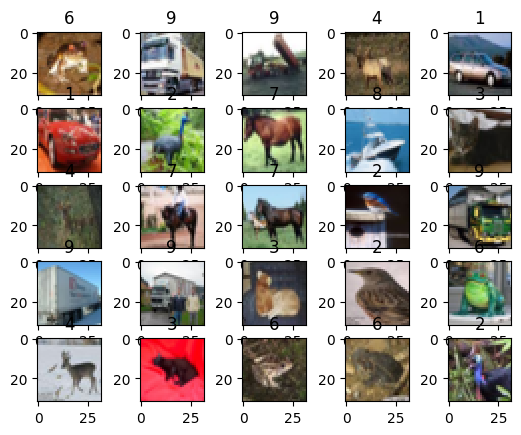

In [20]:
#Visuvalization of images
fig,ax = plt.subplots(5,5)
k = 0
for i in range(5):
    for j in range(5):
      image = x_train[k].reshape(32,32,3)
      ax[i,j].imshow(image,cmap='gray')
      ax[i,j].set_title(y_train[k])
      k+=1
plt.show()

In [21]:
#No.of clusster
n = len(set(y_train))
print("NO_OF CLUSters: ",n)
#Building the model functality
i = Input(shape=(32,32,3))
x = Conv2D(32,(3,3),activation='relu',padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),activation='relu',padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)

x = Dense(n,activation='softmax')(x)
model = Model(i,x )

model.summary()

NO_OF CLUSters:  10


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,397,226 (9.14 MB)

 Trainable params: 2,396,330 (9.14 MB)

 Non-trainable params: 896 (3.50 KB)

In [22]:
#Compiler
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.optimizer)
print(model.loss)
print(model.metrics)
#FIT
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)
print(history)

sparse_categorical_crossentropy
[<Mean name=loss>, <CompileMetrics name=compile_metrics>]
Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 19s 408ms/step - accuracy: 0.2021 - loss: 4.7315 - val_accuracy: 0.1230 - val_loss: 2.4589
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 392ms/step - accuracy: 0.3916 - loss: 1.7911 - val_accuracy: 0.1270 - val_loss: 2.9805
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 389ms/step - accuracy: 0.5798 - loss: 1.2294 - val_accuracy: 0.0910 - val_loss: 3.6045
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.6365 - loss: 1.0353 - val_accuracy: 0.0900 - val_loss: 5.0480
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 353ms/step - accuracy: 0.7513 - loss: 0.7039 - val_accuracy: 0.1010 - val_loss: 5.4455
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 394ms/step - accuracy: 0.8572 - loss: 0.4671 - val_accuracy: 0.1020 - val_loss: 5.7376
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 20s 368ms/step - accuracy: 0.8250 - loss: 0.5106 - val_accuracy: 0.0900 - val_loss: 5.1194


In [ ]:
#Fit argumentation_Data
batch_size = 32
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False)
traingen = datagen.flow(x_train, y_train, batch_size=batch_size)
validation_data = datagen.flow(x_test, y_test, batch_size=batch_size)
steps_per_epochs = x_train.shape[0] // batch_size
validation_steps = x_test.shape[0] // batch_size
read = model.fit(traingen, validation_data=(x_test,y_test),steps_per_epoch=steps_per_epochs,validation_steps=validation_steps,epochs=100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 387ms/step - accuracy: 0.9946 - loss: 0.0167 - val_accuracy: 0.3850 - val_loss: 4.4903
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9688 - loss: 0.0954  
Epoch 3/100


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 440ms/step - accuracy: 0.9884 - loss: 0.0585 - val_accuracy: 0.3830 - val_loss: 4.7450
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.9062 - loss: 0.1337  
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 16s 400ms/step - accuracy: 0.9789 - loss: 0.0669 - val_accuracy: 0.4540 - val_loss: 3.8618
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.9688 - loss: 0.0538
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 11s 371ms/step - accuracy: 0.9598 - loss: 0.1288 - val_accuracy: 0.3570 - val_loss: 5.0108
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9062 - loss: 0.4706   
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 21s 411ms/step - accuracy: 0.9535 - loss: 0.1820 - val_accuracy: 0.3890 - val_loss: 5.0615
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.9688 - loss: 0.0805
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - accuracy: 0.9649 - loss: 0.1388 - val_accuracy: 0.3830 - val_loss: 4.6765
Epoch 12/1

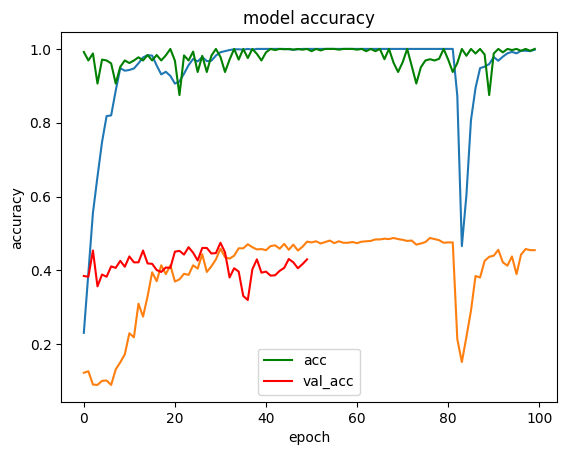

In [30]:
#Plt Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.plot(read.history['accuracy'],label='acc',color="green")
plt.plot(read.history['val_accuracy'],label='val_acc',color="red")
plt.legend()

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step
airplane
(1, 32, 32, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[9.9048537e-01 1.0315470e-04 9.1433562e-11 7.9790607e-06 1.5128842e-08
  1.0218269e-12 2.2435368e-11 3.5419918e-05 9.2456611e-03 1.2236752e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Predicted Label:  airplane
Original Label:  ship


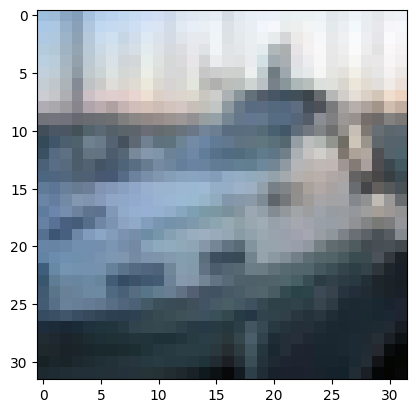

In [35]:
#Label-Mapping
labels = '''airplane automobile bird cat deer dog frog horse ship truck'''.split()
print(labels)
image_number = 2
plt.imshow(x_test[image_number])
pred = model.predict(x_test)
print(labels[np.argmax(pred[image_number])])
n = np.array(x_test[image_number])
p = n.reshape(1,32,32,3)
print(p.shape)
print(model.predict(p))
print(labels[np.argmax(model.predict(p))])
predicted_label = labels[np.argmax(model.predict(p))]
orginal_label = labels[y_test[image_number]]
print("Predicted Label: ",predicted_label)
print("Original Label: ",orginal_label)

#CONCULSION: Image classification with CNN-Model-Training the models with epochs-100:-accuracy :varies a diferent a lot for each epochs of trainning,test data samples of ->x,y